In [1]:
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
%aimport Variant_analysis_helper_functions


import protfasta
import os

In [2]:
d_domains = "../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/"
files = os.listdir(d_domains)
ENST_codes = [f.replace(".bed", "") for f in files if f !='.ipynb_checkpoints']

uniprotID_ENST_mapping = pd.read_csv("../../data/SFARI_TFs_with_ENST_corrected.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["ENST"], uniprotID_ENST_mapping["uniprotID"]))
uniprotID_ENST_mapping_dict['ENST00000434704'] = 'O60479'

# ENSTs to keep, SK 11/18/24
ENST_codes = set(ENST_codes) & set(uniprotID_ENST_mapping_dict.keys())

SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")

output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0, 1, domain_types = ["AD", "DBD", "RD"], print_output = False)

In [3]:
output

,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop
0,P26367,1269,92,0.072498,456,42,0.092105,546,18,0.032967,0,0,NaN
1,Q9Y458,1563,127,0.081254,240,19,0.079167,570,42,0.073684,240,18,0.075000
2,Q9UL68,3561,281,0.078910,822,69,0.083942,552,20,0.036232,720,47,0.065278
3,P32242,1065,108,0.101408,549,67,0.122040,171,9,0.052632,0,0,NaN
4,P35398,1572,140,0.089059,342,14,0.040936,210,6,0.028571,240,22,0.091667
5,O95096,822,116,0.141119,162,35,0.216049,171,10,0.058480,351,32,0.091168
6,Q12857,1530,98,0.064052,249,11,0.044177,315,17,0.053968,270,24,0.088889
7,Q13422,1560,162,0.103846,246,36,0.146341,279,10,0.035842,0,0,NaN
8,O14770,1434,137,0.095537,414,67,0.161836,174,4,0.022989,132,6,0.045455
9,O60479,864,97,0.112269,465,54,0.116129,171,11,0.064327,480,51,0.106250


In [4]:
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(output, "AD")
output = pd.merge(SFARI_TFs[["gene-symbol", "uniprotID"]], output)
output

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154,217,0.100743,582,49,0.084192,162,8,0.049383,240,26,0.108333,1.261400e-01
1,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,171,3,0.017544,198,17,0.085859,4.800899e-01
2,AR,P10275,2763,219,0.079262,2259,182,0.080567,210,9,0.042857,750,88,0.117333,6.488056e-01
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03
4,CC2D1A,Q6P1N0,2856,435,0.152311,117,13,0.111111,2853,435,0.152471,0,0,NaN,2.376139e-01
5,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,339,18,0.053097,1167,149,0.127678,8.604581e-01
6,EBF3,Q9H4W6,1791,138,0.077052,240,17,0.070833,693,34,0.049062,0,0,NaN,7.951436e-01
7,EGR3,Q06889,1164,101,0.086770,606,61,0.100660,213,12,0.056338,63,1,0.015873,9.507787e-02
8,ESR2,Q92731,1593,209,0.131199,1035,126,0.121739,210,27,0.128571,480,60,0.125000,1.394075e-01
9,GLIS1,Q8NBF1,1863,303,0.162641,522,75,0.143678,381,38,0.099738,240,23,0.095833,1.841198e-01


---
AD vs DBD

In [5]:
contains_DBD = output[output["DBD_cds_length"] != 0]
contains_DBD = contains_DBD.reset_index(drop = True)
contains_DBD

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154,217,0.100743,582,49,0.084192,162,8,0.049383,240,26,0.108333,1.261400e-01
1,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,171,3,0.017544,198,17,0.085859,4.800899e-01
2,AR,P10275,2763,219,0.079262,2259,182,0.080567,210,9,0.042857,750,88,0.117333,6.488056e-01
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03
4,CC2D1A,Q6P1N0,2856,435,0.152311,117,13,0.111111,2853,435,0.152471,0,0,NaN,2.376139e-01
5,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,339,18,0.053097,1167,149,0.127678,8.604581e-01
6,EBF3,Q9H4W6,1791,138,0.077052,240,17,0.070833,693,34,0.049062,0,0,NaN,7.951436e-01
7,EGR3,Q06889,1164,101,0.086770,606,61,0.100660,213,12,0.056338,63,1,0.015873,9.507787e-02
8,ESR2,Q92731,1593,209,0.131199,1035,126,0.121739,210,27,0.128571,480,60,0.125000,1.394075e-01
9,GLIS1,Q8NBF1,1863,303,0.162641,522,75,0.143678,381,38,0.099738,240,23,0.095833,1.841198e-01


In [6]:
Variant_analysis_helper_functions.add_fisher_p_vals_vs_control(contains_DBD, "AD", "DBD")

[[49, 8], [533, 154]]
[[20, 3], [253, 168]]
[[182, 9], [2077, 201]]
[[87, 65], [378, 760]]
[[13, 435], [104, 2418]]
[[108, 18], [774, 321]]
[[17, 34], [223, 659]]
[[61, 12], [545, 201]]
[[126, 27], [909, 183]]
[[75, 38], [447, 343]]
[[54, 5], [519, 235]]
[[336, 17], [2256, 265]]
[[36, 10], [210, 269]]
[[38, 20], [232, 235]]
[[26, 19], [106, 200]]
[[27, 5], [273, 214]]
[[24, 5], [396, 139]]
[[59, 5], [1102, 139]]
[[67, 4], [347, 170]]
[[14, 15], [88, 156]]
[[98, 18], [793, 432]]
[[69, 20], [753, 532]]
[[114, 11], [1116, 157]]
[[98, 36], [502, 153]]
[[11, 17], [238, 298]]
[[16, 15], [251, 300]]
[[89, 12], [745, 201]]
[[16, 9], [302, 201]]
[[35, 10], [127, 161]]
[[67, 9], [482, 162]]
[[15, 10], [150, 365]]
[[42, 18], [414, 528]]
[[23, 9], [127, 162]]
[[14, 6], [328, 204]]
[[40, 8], [887, 298]]
[[744, 11], [4968, 106]]
[[19, 42], [221, 528]]
[[119, 727], [862, 5153]]
[[25, 5], [458, 157]]
[[19, 6], [281, 201]]
[[60, 693], [450, 5313]]
[[90, 3], [969, 159]]
[[13, 19], [143, 197]]
[[33, 6], 

In [7]:
contains_DBD.sort_values(by = "ADvsDBD_fisher_exact_p_vals")

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals,ADvsDBD_fisher_exact_p_vals
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03,1.607793e-08
18,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,174,4,0.022989,132,6,0.045455,1.793760e-07,2.613456e-07
43,YY1,P25490,1245,90,0.072289,288,33,0.114583,294,6,0.020408,351,9,0.025641,2.632369e-03,3.527235e-06
20,MTF1,Q14872,2262,214,0.094607,891,98,0.109989,450,18,0.040000,420,42,0.100000,4.716823e-02,7.597165e-06
12,IKZF1,Q13422,1560,162,0.103846,246,36,0.146341,279,10,0.035842,0,0,NaN,2.231205e-02,8.356314e-06
28,NKX2-2,O95096,822,116,0.141119,162,35,0.216049,171,10,0.058480,351,32,0.091168,3.566762e-03,2.328844e-05
10,ERG,P11308,1440,128,0.088889,573,54,0.094241,240,5,0.020833,960,94,0.097917,5.713322e-01,8.674520e-05
31,PAX6,P26367,1269,92,0.072498,456,42,0.092105,546,18,0.032967,0,0,NaN,5.455985e-02,8.964767e-05
5,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,339,18,0.053097,1167,149,0.127678,8.604581e-01,2.164839e-04
21,MYT1L,Q9UL68,3561,281,0.078910,822,69,0.083942,552,20,0.036232,720,47,0.065278,5.551851e-01,3.228583e-04


In [8]:
contains_DBD_sig = Variant_analysis_helper_functions.return_bh_sig(contains_DBD, "ADvsDBD_fisher_exact_p_vals", 0.1)
contains_DBD_sig

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals,ADvsDBD_fisher_exact_p_vals
1,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,171,3,0.017544,198,17,0.085859,4.800899e-01,8.433192e-03
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03,1.607793e-08
5,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,339,18,0.053097,1167,149,0.127678,8.604581e-01,2.164839e-04
10,ERG,P11308,1440,128,0.088889,573,54,0.094241,240,5,0.020833,960,94,0.097917,5.713322e-01,8.674520e-05
11,HIVEP3,Q5T1R4,7221,985,0.136408,2592,336,0.129630,282,17,0.060284,270,21,0.077778,2.112343e-01,3.789612e-04
12,IKZF1,Q13422,1560,162,0.103846,246,36,0.146341,279,10,0.035842,0,0,NaN,2.231205e-02,8.356314e-06
13,KDM5B,Q9UGL1,4635,542,0.116936,270,38,0.140741,255,20,0.078431,351,36,0.102564,2.051619e-01,2.576976e-02
14,KLF16,Q9BXK1,759,119,0.156785,132,26,0.196970,219,19,0.086758,0,0,NaN,1.870981e-01,4.613641e-03
15,KLF7,O75840,909,75,0.082508,300,27,0.090000,219,5,0.022831,330,28,0.084848,6.084149e-01,1.425888e-03
18,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,174,4,0.022989,132,6,0.045455,1.793760e-07,2.613456e-07


In [9]:
contains_DBD_sig.sort_values(by = "ADvsDBD_fisher_exact_p_vals")

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals,ADvsDBD_fisher_exact_p_vals
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03,1.607793e-08
18,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,174,4,0.022989,132,6,0.045455,1.793760e-07,2.613456e-07
43,YY1,P25490,1245,90,0.072289,288,33,0.114583,294,6,0.020408,351,9,0.025641,2.632369e-03,3.527235e-06
20,MTF1,Q14872,2262,214,0.094607,891,98,0.109989,450,18,0.040000,420,42,0.100000,4.716823e-02,7.597165e-06
12,IKZF1,Q13422,1560,162,0.103846,246,36,0.146341,279,10,0.035842,0,0,NaN,2.231205e-02,8.356314e-06
28,NKX2-2,O95096,822,116,0.141119,162,35,0.216049,171,10,0.058480,351,32,0.091168,3.566762e-03,2.328844e-05
10,ERG,P11308,1440,128,0.088889,573,54,0.094241,240,5,0.020833,960,94,0.097917,5.713322e-01,8.674520e-05
31,PAX6,P26367,1269,92,0.072498,456,42,0.092105,546,18,0.032967,0,0,NaN,5.455985e-02,8.964767e-05
5,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,339,18,0.053097,1167,149,0.127678,8.604581e-01,2.164839e-04
21,MYT1L,Q9UL68,3561,281,0.078910,822,69,0.083942,552,20,0.036232,720,47,0.065278,5.551851e-01,3.228583e-04


In [10]:
# Longer list than before!
contains_DBD_sig.sort_values(by = "ADvsDBD_fisher_exact_p_vals")[["gene-symbol", "uniprotID", "AD_missense_prop", "DBD_missense_prop", "TF_missense_prop", "ADvsDBD_fisher_exact_p_vals"]]

,gene-symbol,uniprotID,AD_missense_prop,DBD_missense_prop,TF_missense_prop,ADvsDBD_fisher_exact_p_vals
3,CASZ1,Q86V15,0.187097,0.078788,0.139015,1.607793e-08
18,MEIS2,O14770,0.161836,0.022989,0.095537,2.613456e-07
43,YY1,P25490,0.114583,0.020408,0.072289,3.527235e-06
20,MTF1,Q14872,0.109989,0.040000,0.094607,7.597165e-06
12,IKZF1,Q13422,0.146341,0.035842,0.103846,8.356314e-06
28,NKX2-2,O95096,0.216049,0.058480,0.141119,2.328844e-05
10,ERG,P11308,0.094241,0.020833,0.088889,8.674520e-05
31,PAX6,P26367,0.092105,0.032967,0.072498,8.964767e-05
5,CAMTA2,O94983,0.122449,0.053097,0.124411,2.164839e-04
21,MYT1L,Q9UL68,0.083942,0.036232,0.078910,3.228583e-04


---
AD vs TF

In [46]:
decisions = Variant_analysis_helper_functions.benjamini_hochberg(output["ADvsTF_fisher_exact_p_vals"], 0.1)
sig_output = output[decisions]
sig_output

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03
18,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,174,4,0.022989,132,6,0.045455,1.793760e-07
22,NCOA1,Q15788,4326,484,0.111882,1230,114,0.092683,168,11,0.065476,810,69,0.085185,1.191144e-02
27,NR4A2,P43354,1797,159,0.088481,318,16,0.050314,210,9,0.042857,1080,116,0.107407,6.456734e-03
28,NKX2-2,O95096,822,116,0.141119,162,35,0.216049,171,10,0.058480,33,1,0.030303,3.566762e-03
33,RORA,P35398,1572,140,0.089059,342,14,0.040936,210,6,0.028571,240,22,0.091667,2.300657e-04
39,TCF7L2,Q9NQB0,1860,204,0.109677,300,19,0.063333,207,6,0.028986,0,0,NaN,4.520557e-03
43,YY1,P25490,1245,90,0.072289,288,33,0.114583,294,6,0.020408,351,9,0.025641,2.632369e-03


In [47]:
sig_output.sort_values(by = "ADvsTF_fisher_exact_p_vals")

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
18,MEIS2,O14770,1434,137,0.095537,414,67,0.161836,174,4,0.022989,132,6,0.045455,1.793760e-07
33,RORA,P35398,1572,140,0.089059,342,14,0.040936,210,6,0.028571,240,22,0.091667,2.300657e-04
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03
43,YY1,P25490,1245,90,0.072289,288,33,0.114583,294,6,0.020408,351,9,0.025641,2.632369e-03
28,NKX2-2,O95096,822,116,0.141119,162,35,0.216049,171,10,0.058480,33,1,0.030303,3.566762e-03
39,TCF7L2,Q9NQB0,1860,204,0.109677,300,19,0.063333,207,6,0.028986,0,0,NaN,4.520557e-03
27,NR4A2,P43354,1797,159,0.088481,318,16,0.050314,210,9,0.042857,1080,116,0.107407,6.456734e-03
22,NCOA1,Q15788,4326,484,0.111882,1230,114,0.092683,168,11,0.065476,810,69,0.085185,1.191144e-02


In [48]:
sig_output[sig_output["AD_missense_prop"] < sig_output["TF_missense_prop"]]

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
22,NCOA1,Q15788,4326,484,0.111882,1230,114,0.092683,168,11,0.065476,810,69,0.085185,0.011911
27,NR4A2,P43354,1797,159,0.088481,318,16,0.050314,210,9,0.042857,1080,116,0.107407,0.006457
33,RORA,P35398,1572,140,0.089059,342,14,0.040936,210,6,0.028571,240,22,0.091667,0.000230
39,TCF7L2,Q9NQB0,1860,204,0.109677,300,19,0.063333,207,6,0.028986,0,0,NaN,0.004521


---
Density of variants in RD

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

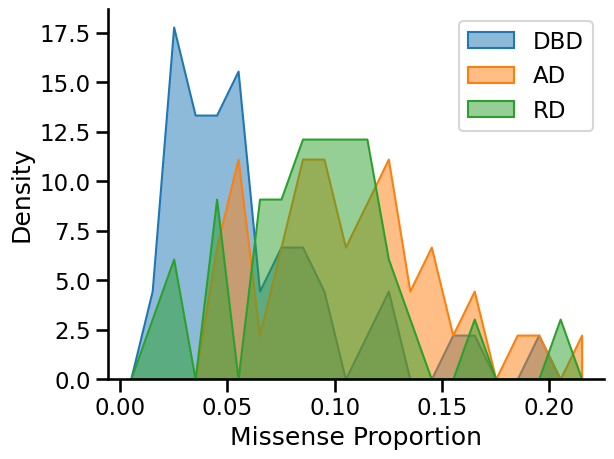

In [16]:
sns.set_context('talk')
bins = np.arange(0, 0.23, 0.01)
sns.histplot(output["DBD_missense_prop"], bins = bins, label = "DBD", element = "poly", alpha = 0.5, stat = 'density')
sns.histplot(output["AD_missense_prop"], bins = bins, label = "AD", element = "poly", alpha = 0.5, stat = 'density')
sns.histplot(output["RD_missense_prop"], bins = bins, label = "RD", element = "poly", alpha = 0.5, stat = 'density')
plt.legend(facecolor='white')
plt.xlabel("Missense Proportion")
sns.despine()

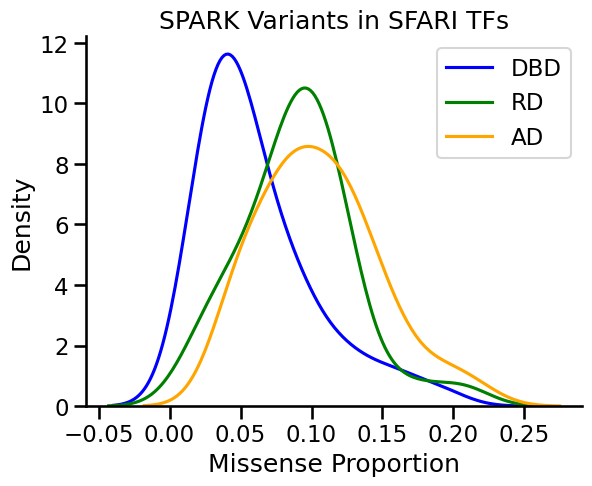

In [17]:
sns.set_context('talk')
bins = np.arange(0, 0.23, 0.01)
sns.kdeplot(output["DBD_missense_prop"], label = "DBD",  color = "b")
#sns.rugplot(output["DBD_missense_prop"], expand_margins = True, color = "blue")

sns.kdeplot(output["RD_missense_prop"], label = "RD", color = "g")
#sns.rugplot(output["RD_missense_prop"], expand_margins = True, color = "green")

sns.kdeplot(output["AD_missense_prop"], label = "AD", color = "orange")
#sns.rugplot(output["AD_missense_prop"], expand_margins = True, color = "orange")

plt.title("SPARK Variants in SFARI TFs");

plt.legend(facecolor='white')
plt.xlabel("Missense Proportion")
sns.despine()

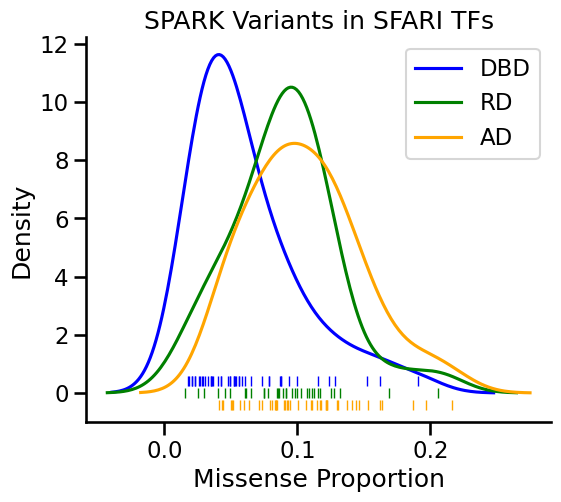

In [18]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("SPARK Variants in SFARI TFs");
# Plot KDEs
sns.kdeplot(output["DBD_missense_prop"], label="DBD", color="b", ax=ax)
sns.kdeplot(output["RD_missense_prop"], label="RD", color="g", ax=ax)
sns.kdeplot(output["AD_missense_prop"], label="AD", color="orange", ax=ax)

# Custom rugplots by manually plotting points at different y-positions
def custom_rugplot(data, ax, color, offset):
    """ Custom function to plot rug plots with an offset. """
    ax.plot(data, np.full_like(data, offset), '|', color=color, markersize=7.5)

# Plot custom rug plots at different y-offsets
custom_rugplot(output["DBD_missense_prop"], ax, color="b", offset=0.4)
custom_rugplot(output["RD_missense_prop"], ax, color="g", offset=0)
custom_rugplot(output["AD_missense_prop"], ax, color="orange", offset=-0.4)

# min_x = min(min(output["DBD_missense_prop"]), min(output["RD_missense_prop"]), min(output["AD_missense_prop"]))
# max_x = max(max(output["DBD_missense_prop"]), max(output["RD_missense_prop"]), max(output["AD_missense_prop"]))
# plt.xlim(max(0, min_x-0.1), max_x)
         
# Add the legend and labels
plt.legend(facecolor='white')
plt.xlabel("Missense Proportion")
sns.despine()

# Show the plot
plt.show()

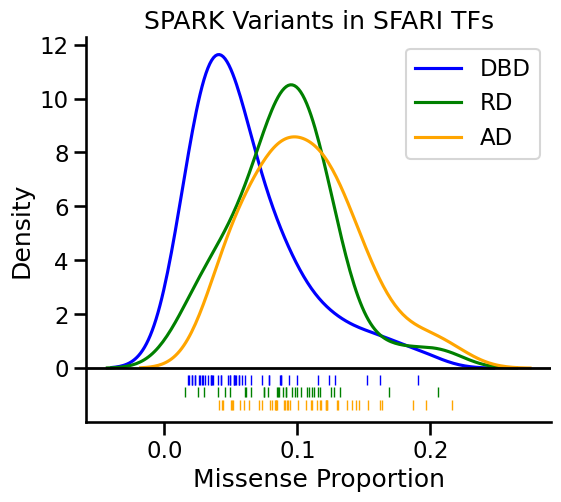

In [19]:
sns.set_context('talk')
sns.sejt_fig, ax = plt.subplots(figsize=(6, 5))
plt.title("SPARK Variants in SFARI TFs");
# Plot KDEs
sns.kdeplot(output["DBD_missense_prop"], label="DBD", color="b", ax=ax)
sns.kdeplot(output["RD_missense_prop"], label="RD", color="g", ax=ax)
sns.kdeplot(output["AD_missense_prop"], label="AD", color="orange", ax=ax)

# Custom rugplots by manually plotting points at different y-positions
def custom_rugplot(data, ax, color, offset):
    """ Custom function to plot rug plots with an offset. """
    ax.plot(data, np.full_like(data, offset), '|', color=color, markersize=7.5)

# Plot custom rug plots at different y-offsets
plt.axhline(0, color = "black", linewidth =2)
custom_rugplot(output["DBD_missense_prop"], ax, color="b", offset=-0.45)
custom_rugplot(output["RD_missense_prop"], ax, color="g", offset=-0.9)
custom_rugplot(output["AD_missense_prop"], ax, color="orange", offset=-1.35)

# min_x = min(min(output["DBD_missense_prop"]), min(output["RD_missense_prop"]), min(output["AD_missense_prop"]))
# max_x = max(max(output["DBD_missense_prop"]), max(output["RD_missense_prop"]), max(output["AD_missense_prop"]))
# plt.xlim(max(0, min_x-0.1), max_x)
         
# Add the legend and labels
plt.legend(facecolor='white')
plt.xlabel("Missense Proportion")
sns.despine()

# Show the plot
plt.show()

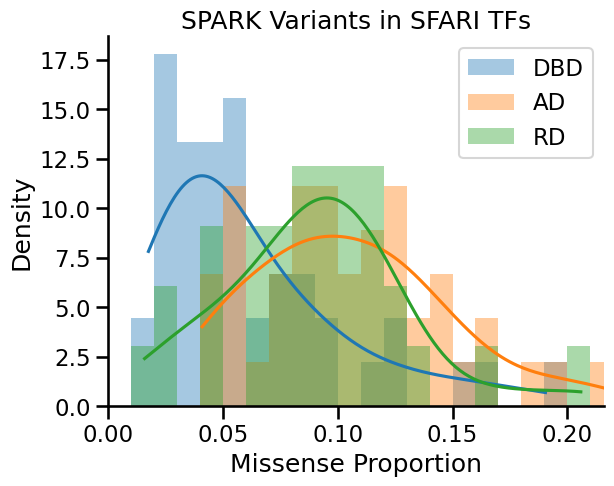

In [20]:
sns.set_context('talk')
bins = np.arange(0, 0.23, 0.01)
sns.histplot(output["DBD_missense_prop"], bins = bins, label = "DBD", edgecolor='none', alpha = 0.4, stat = 'density', kde = True)
sns.histplot(output["AD_missense_prop"], bins = bins, label = "AD", edgecolor='none', alpha = 0.4, stat = 'density', kde = True)
sns.histplot(output["RD_missense_prop"], bins = bins, label = "RD", edgecolor='none', alpha = 0.4, stat = 'density', kde = True)
min_x = min(min(output["DBD_missense_prop"]), min(output["RD_missense_prop"]), min(output["AD_missense_prop"]))
max_x = max(max(output["DBD_missense_prop"]), max(output["RD_missense_prop"]), max(output["AD_missense_prop"]))
        
plt.legend(facecolor='white')
plt.xlabel("Missense Proportion")
plt.xlim(max(0, min_x-0.1), max_x)

sns.despine()
plt.title("SPARK Variants in SFARI TFs");

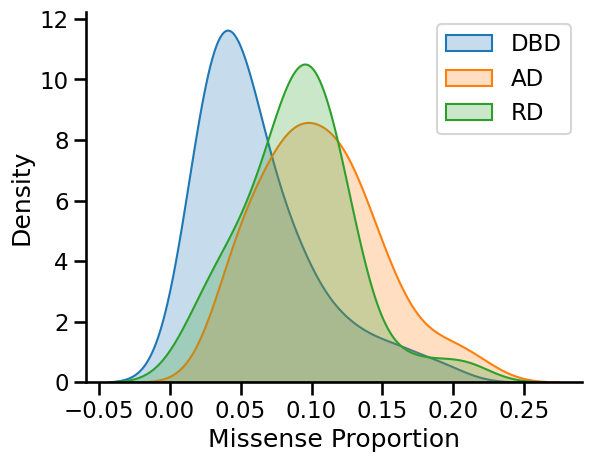

In [21]:
sns.set_context('talk')
bins = np.arange(0, 0.23, 0.01)
sns.kdeplot(output["DBD_missense_prop"], label = "DBD",  fill = True)

sns.kdeplot(output["AD_missense_prop"], label = "AD", fill = True)

sns.kdeplot(output["RD_missense_prop"], label = "RD", fill = True)

plt.legend(facecolor='white')
plt.xlabel("Missense Proportion")
sns.despine()

In [22]:
output.to_csv("../outputs/enrichment_analysis_summary_table.csv")
output

,gene-symbol,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop,ADvsTF_fisher_exact_p_vals
0,ARNT2,Q9HBZ2,2154,217,0.100743,582,49,0.084192,162,8,0.049383,240,26,0.108333,1.261400e-01
1,ARX,Q96QS3,1689,146,0.086442,273,20,0.073260,171,3,0.017544,198,17,0.085859,4.800899e-01
2,AR,P10275,2763,219,0.079262,2259,182,0.080567,210,9,0.042857,750,88,0.117333,6.488056e-01
3,CASZ1,Q86V15,5280,734,0.139015,465,87,0.187097,825,65,0.078788,720,83,0.115278,2.479347e-03
4,CC2D1A,Q6P1N0,2856,435,0.152311,117,13,0.111111,2853,435,0.152471,0,0,NaN,2.376139e-01
5,CAMTA2,O94983,3609,449,0.124411,882,108,0.122449,339,18,0.053097,1167,149,0.127678,8.604581e-01
6,EBF3,Q9H4W6,1791,138,0.077052,240,17,0.070833,693,34,0.049062,0,0,NaN,7.951436e-01
7,EGR3,Q06889,1164,101,0.086770,606,61,0.100660,213,12,0.056338,63,1,0.015873,9.507787e-02
8,ESR2,Q92731,1593,209,0.131199,1035,126,0.121739,210,27,0.128571,480,60,0.125000,1.394075e-01
9,GLIS1,Q8NBF1,1863,303,0.162641,522,75,0.143678,381,38,0.099738,240,23,0.095833,1.841198e-01
